Importar librerias

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [5]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Revisar datos

In [8]:
pizza = pd.read_csv('../data/raw/pizza_sales.csv')

In [9]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
pizza.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Visualizaciones

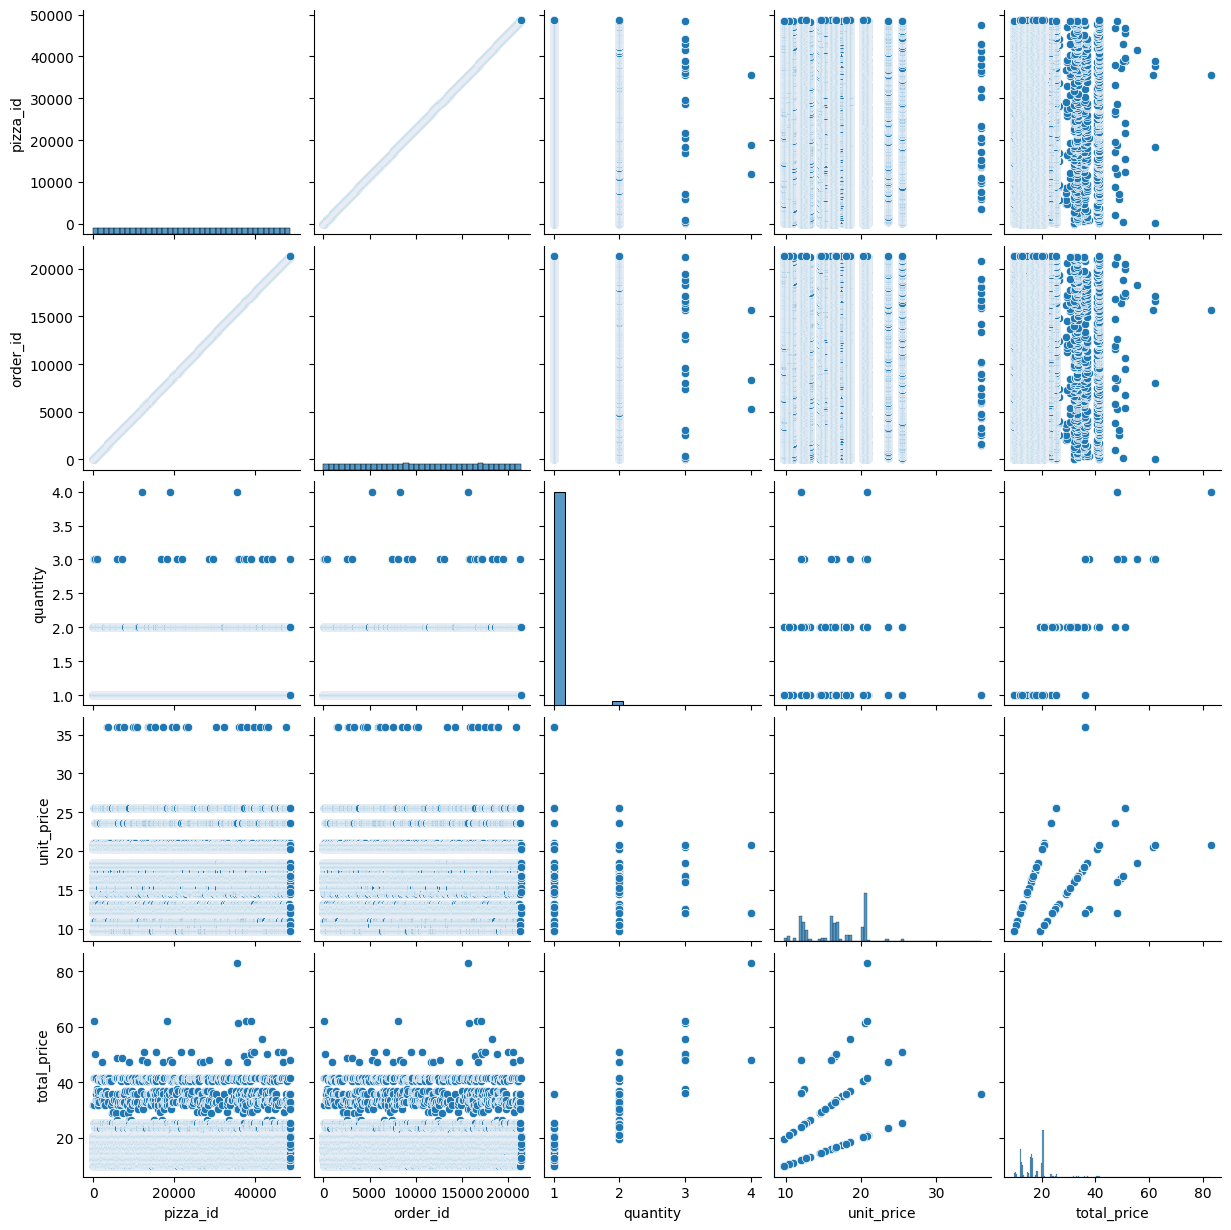

In [ ]:
sns.pairplot(pizza);

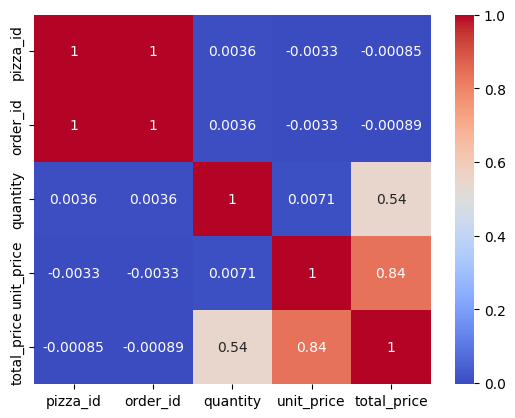

In [ ]:
sns.heatmap(pizza.corr(numeric_only=True), annot=True,cmap='coolwarm');

In [13]:
pizza.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [ ]:
pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [14]:
pizza = pizza.drop(columns='pizza_id')

In [15]:
pizza = pizza.drop(columns='pizza_name_id')

In [ ]:
pizza['pizza_category'].nunique()

4

In [18]:
label = LabelEncoder() 
pizza['pizza_category'] = label.fit_transform(pizza['pizza_category'])

In [20]:
pizza['pizza_ingredients'].nunique()

32

In [24]:
pizza['pizza_size'].nunique()

5

In [23]:
label = LabelEncoder() 
pizza['pizza_size'] = label.fit_transform(pizza['pizza_size'])

In [26]:
pizza['pizza_name'].nunique()

32

In [27]:
label = LabelEncoder() 
pizza['pizza_name'] = label.fit_transform(pizza['pizza_name'])

In [ ]:
pizza['pizza_size'].nunique()

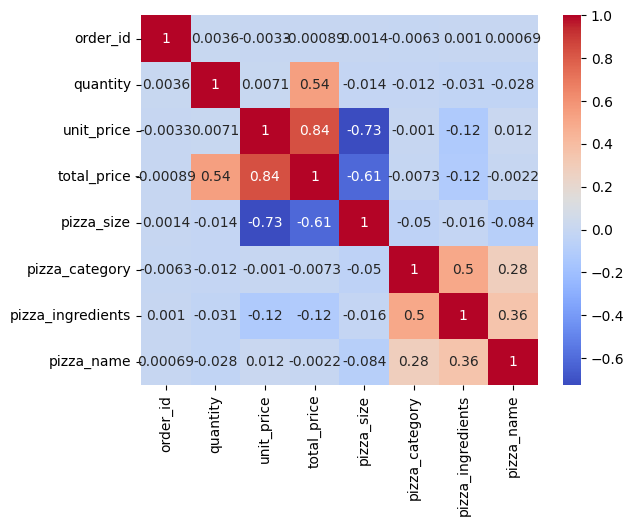

In [ ]:
sns.heatmap(pizza.corr(numeric_only=True), annot=True,cmap='coolwarm');

Modelo

In [ ]:
X = pizza[['unit_price', 'quantity']]
y = pizza[['total_price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [ ]:
print(X_train.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(38896, 2)
(38896, 2)
(9724, 1)
(38896, 1)


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=13)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=13)

In [ ]:
tree_reg.score(X_train,y_train)

0.8153958145693685

In [ ]:
predicts = tree_reg.predict(X_test)

Resultados

In [ ]:
print('MAE:',mean_absolute_error(y_test, predicts))
print('MSE:',mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicts)))


MAE: 0.7588822978617429
MSE: 3.784380890301198
RMSE: 1.945348526691605


4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 